In [20]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sympy as sy
import pandas as pd
from IPython.display import HTML, display_html, display
from scipy import integrate

In [2]:
# Datos de tiempo y corriente
t =np.array ([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

# Crear un DataFrame
df = pd.DataFrame({'Tiempo': t, 'Corriente': i})

# Mostrar el DataFrame
df

,Tiempo,Corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [3]:
#calculo de las derivadas numericas
der= (np.diff(i)/np.diff(t))


der

array([2., 2., 4., 6.])

In [4]:
x = i[0:4]
y = i[1:]

x_ = t[0:4]
y_ = t[1:]

promi = (x+y)/2
promt = (x_+y_)/2
resultados = {'PromedioTiempo': promt, 'PromedioCorriente': promi,'Derivadas':der}
df1 = pd.DataFrame(resultados)

display(HTML('<h2>Resultados</h2>'))
display_html(df1)



,PromedioTiempo,PromedioCorriente,Derivadas
0,1.005,3.11,2.0
1,1.015,3.13,2.0
2,1.025,3.16,4.0
3,1.035,3.21,6.0


In [5]:
#calculo de Fem
l=0.98
r=0.142
Fem= l*der+r*promi
Fem

array([2.40162, 2.40446, 4.36872, 6.33582])

In [6]:
df1["FuerzaElectromagnetica"]=(Fem)
df1

,PromedioTiempo,PromedioCorriente,Derivadas,FuerzaElectromagnetica
0,1.005,3.11,2.0,2.40162
1,1.015,3.13,2.0,2.40446
2,1.025,3.16,4.0,4.36872
3,1.035,3.21,6.0,6.33582


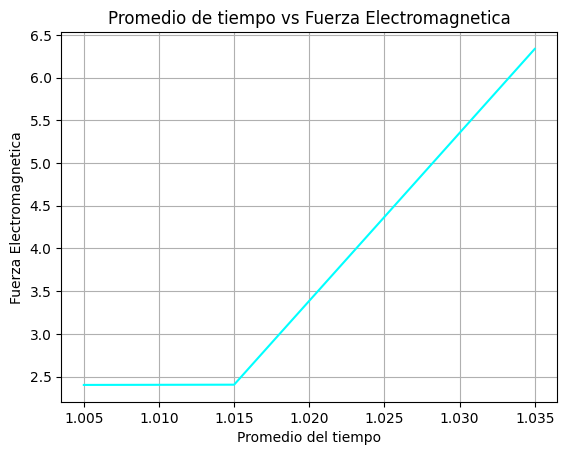

In [7]:
plt.figure()
plt.plot(df1.PromedioTiempo,df1.FuerzaElectromagnetica,color="aqua")
plt.xlabel("Promedio del tiempo")
plt.ylabel("Fuerza Electromagnetica")
plt.title("Promedio de tiempo vs Fuerza Electromagnetica")
plt.grid()
plt.show()

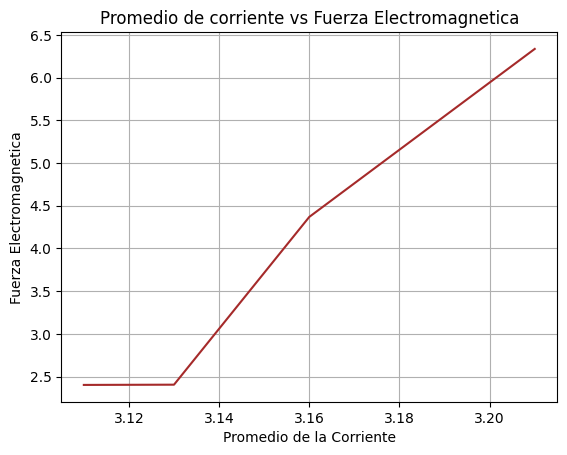

In [8]:
plt.figure()
plt.plot(df1.PromedioCorriente,df1.FuerzaElectromagnetica,color="brown")
plt.xlabel("Promedio de la Corriente")
plt.ylabel("Fuerza Electromagnetica")
plt.title("Promedio de corriente vs Fuerza Electromagnetica")
plt.grid()
plt.show()

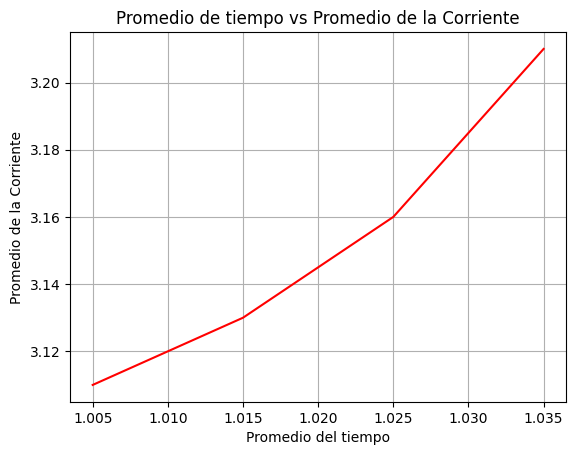

In [9]:
plt.figure()
plt.plot(df1.PromedioTiempo,df1.PromedioCorriente,color="red")
plt.xlabel("Promedio del tiempo")
plt.ylabel("Promedio de la Corriente")
plt.title("Promedio de tiempo vs Promedio de la Corriente")
plt.grid()
plt.show()

Integracion de caja negra

# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!--
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


-

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!--
-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!--
-
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.

# **Metodo del Trapecio**

\begin{equation}
\int_{a}^{b} f(x) dx \approx \frac{h}{2} \left[ f(a) + 2\sum_{i=1}^{n-1} f(a + ih) + f(b) \right]
\end{equation}

Donde:
- $a$ y $b$ son los límites del intervalo de integración.
- $n$ es el número de subintervalos.
- $h$ es la longitud de cada subintervalo, calculada como $h = \frac{b - a}{n}$.
- $f(x)$ es la función que se está integrando.

# **Metodo de Simpson**

\begin{equation}
\int_{a}^{b} f(x) dx = \frac{h}{3} [f(a)+2\sum_{j = 1}^{\frac{n}{2} - 1} f(x_{2j}) + 4 \sum_{j = 1}^{\frac{n}{2}} f(x_{2j - 1} ) +f(b)] -  \frac{b-a}{180} h^4\left(f^{(4)}(\mu )\right)                                                                                                     
\end{equation}

Donde:
- \(a\) y \(b\) son los límites del intervalo de integración.
- \(n\) es el número de subintervalos.
- \(h\) es la longitud de cada subintervalo, calculada como $h = \frac{b - a}{n}$.
- \(f(x)\) es la función que se está integrando.


# **Metodo de Cuadratura**
\begin{equation}
\int_{a}^{b} f(x) dx \approx \sum_{i=1}^{n} w_i \cdot f(x_i)
\end{equation}

Donde:
- $a$ y $b$ son los límites del intervalo de integración.
- $n$ es el número de nodos.
- $w_i$ son los pesos asociados a cada nodo $x_i$.
- $x_i$ son los nodos de integración.

In [10]:
# Funcion regla del trapecio
def integral_trapz(f,a,b,N):
  x = np.linspace(a,b,int(N))
  h = x[1]-x[0]

  t1 =f(x[1:-1:1]).sum()

  A = (f(a) + f(b) + 2*t1)*(h/2)
  return A

In [11]:
# Funcion para la regla de Simpson
def simp(f,a,b,n):

  x = np.linspace(a,b,n)
  h = x[1]-x[0]

  par = f(x[2:n-2:2]).sum()
  inp = f(x[1:n-1:2]).sum()

  integral = (h/3) * (f(a) + 2*par + 4*inp + f(b))

  return integral


In [12]:
#funciin para la cuadratura
def cuadratura(func, a, b, n):
    h = (b - a) / n
    integral = 0.0
    for i in range(n):
        xi = a + (i + 0.5) * h
        integral += func(xi)
    integral *= h
    return integral


$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

In [13]:
# metodo del trapacio
f = lambda x : 1 / np.sqrt(np.tan(x))
a = 1e-9
A = integral_trapz(f,0.01,np.pi/2,100)
A


2.0303866379057762

In [14]:
# comprobacion con el metodo np.trapz
a = 0.01
b = np.pi/2
f = lambda x : 1 / np.sqrt(np.tan(x))

#integral_trapz(f,0,2,75)
x_ = np.linspace(a,b,100)

integral = np.trapz(f(x_),x_,100)
integral

2.0303866379057762

In [15]:
# Metodo de simpson
integral = simp(f,0.01,np.pi/2,101)
integral

2.0229844443923803

In [16]:
# comparacion con la libreria de Simpson en scipy

x = np.linspace(0.01,np.pi/2,101)
sc.integrate.simpson(f(x),x,101)


2.02298444439238

In [17]:

# metodo de cuadratura
f = lambda x : 1 / np.sqrt(np.tan(x))

A = cuadratura(f,0.01,np.pi/2,100)
A

2.0172902195422555

In [21]:
# comprobacion con el metodo integrate.quad
a = 0.01
b = np.pi/2
f = lambda x : 1 / np.sqrt(np.tan(x))


x_ = np.linspace(a,b,100)

integral = integrate.quad(f,a,b)
integral

(2.021442135751406, 2.7087119214286304e-09)

$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


es la integral de una función racional. Esta integral se puede calcular utilizando un enfoque de simetría y técnicas de cálculo integral. La función f(x) = $\frac{1}{1+x^2}$ tiene simetría par, lo que significa que $f(-x) = f(x)$.

Una forma común de abordar esta integral es utilizando una técnica de valor principal, que se refiere a calcular la integral de menos infinito a más infinito y luego dividirla en dos partes:

\begin{equation}
\int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx = \lim_{A\to\infty} \int_{-A}^{A} \frac{1}{1+x^2} \, dx
\end{equation}

Luego, puedes usar la simetría de la función para simplificar:

\begin{equation}
\int_{-A}^{A} \frac{1}{1+x^2} \, dx = 2\int_{0}^{A} \frac{1}{1+x^2} \, dx
\end{equation}

donde **A** es un numero muy grande

In [22]:
# Metodo del Trapecio
f= lambda x: 1 / (1 + x**2)

# El N debe ser un numero grande numero de elementos de X que se vana  a formar en el linspace
#                       fincion , a ,  b ,   N
resultado = 2*integral_trapz(f, 0, 100000, 1000000)
print(resultado)

3.141572653589797


In [23]:
# comparacion del valos por medio de la libreria
# comprobacion con el metodo np.trapz
a = 0
b = 10000
f = lambda x : 1 / (1 + x**2)

#integral_trapz(f,0,2,75)
x_ = np.linspace(a,b,100000)

integral = 2*np.trapz(f(x_),x_,100)
integral

3.1413926535904566

In [24]:
# Metodo de simpson
integral= 2*simp(f, 0, 100000, 1000000)
integral

3.1415726535697472

In [25]:
## comparacion con la libreria de Simpson en scipy

x = np.linspace(0,100000,10000001)
A = 2*sc.integrate.simpson(f(x),x,10000001)
A

3.141572653589793

In [26]:
# metodode cuadratura
f= lambda x: 1 / (1 + x**2)

# El N debe ser un numero grande numero de elementos de X que se vana  a formar en el linspace
#                       fincion , a ,  b ,   N
resultado = 2*cuadratura(f, 0, 100000, 1000000)
print(resultado)

3.141572653589997


In [27]:
# Comparación con el metodo integrate.quad
a = 0
b = 100000
integral = integrate.quad(f,a,b)
I = integral[0]*2
I

3.1415726535898214

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!--
-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!--
-
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->

In [28]:
# Función para calcular la integral doble por l metodo del trapecio
def double_integral(F, a, b, N):
    x = np.linspace(a, b, N)
    I = np.zeros(len(x))
    for i, x_ in enumerate(x):
        y = np.linspace(np.sin(x_), np.cos(x_), N)
        F_xy = lambda y: F(x_, y)
        I[i] = integral_trapz(F_xy, np.sin(x_), np.cos(x_), N)
    I_interp = lambda x: np.interp(x, np.linspace(a, b, N), I)
    return integral_trapz(I_interp, a, b, N)


F = lambda x,y : 2*y*np.sin(x) + (np.cos(x))**2


a = 0
b = np.pi/4

result = double_integral(F, a, b, 100)
print(result)

0.511833509339219


In [29]:
# Comparacion con la libreria Integrate.Trapzoid
F = lambda x,y : 2*y*np.sin(x) + (np.cos(x))**2
a = 0
b = np.pi/4
N = 100

I = np.zeros(N)
x = np.linspace(a, b, N)


for i, x_ in enumerate(x):
    y = np.linspace(np.sin(x_), np.cos(x_), N)
    F_xy = F(x_, y)
    I[i] = integrate.trapz(F_xy, y)


result = integrate.trapz(I, x)

print(result)

0.5118335093392186


In [30]:
# Función para calcular la integral doble por l metodo del Simpson
def double_integral(F, a, b, N):
    x = np.linspace(a, b, N)
    I = np.zeros(len(x))
    for i, x_ in enumerate(x):
        y = np.linspace(np.sin(x_), np.cos(x_), N)
        F_xy = lambda y: F(x_, y)
        I[i] = simp(F_xy, np.sin(x_), np.cos(x_), N)
    I_interp = lambda x: np.interp(x, np.linspace(a, b, N), I)
    return simp(I_interp, a, b, N)


F = lambda x,y : 2*y*np.sin(x) + (np.cos(x))**2


a = 0
b = np.pi/4

result = double_integral(F, a, b, 101)
print(result)

0.5118446356619841


In [31]:
# Comparacion con la libreria Integrate.simpson
F = lambda x,y : 2*y*np.sin(x) + (np.cos(x))**2
a = 0
b = np.pi/4
N = 100

I = np.zeros(N)
x = np.linspace(a, b, N)


for i, x_ in enumerate(x):
    y = np.linspace(np.sin(x_), np.cos(x_), N)
    F_xy = F(x_, y)
    I[i] = integrate.simpson(F_xy, y)


result = integrate.simpson(I, x)

print(result)

0.5118446374265215


In [32]:
# Funcion de Cuadratura
def double_integral(F, a, b, N):
    x = np.linspace(a, b, N)
    I = np.zeros(len(x))
    for i, x_ in enumerate(x):
        y = np.linspace(np.sin(x_), np.cos(x_), N)
        F_xy = lambda y: F(x_, y)
        I[i] = cuadratura(F_xy, np.sin(x_), np.cos(x_), N)
    I_interp = lambda x: np.interp(x, np.linspace(a, b, N), I)
    return cuadratura(I_interp, a, b, N)


F = lambda x,y : 2*y*np.sin(x) + (np.cos(x))**2


a = 0
b = np.pi/4

resultado = double_integral(F, a, b, 100)
print(resultado)

0.5118398573066196


In [33]:
#comparacion con la libreria para el metodo de cuadratura
F = lambda x, y: 2 * y * np.sin(x) + (np.cos(x))**2
a = 0
b = np.pi/4
N = 100

def integral_y(x):
    return integrate.quad(lambda y: F(x, y), np.sin(x), np.cos(x))[0]

resultado = integrate.quad(integral_y, a, b)

print(resultado)

(0.5118446353109126, 5.682616991530416e-15)


| Integral                                              | Método Trapecio          | Método Simpson           | Método Cuadratura        |
| ---------------------------------------------------- | ------------------------- | ------------------------- | ------------------------- |
| $$ \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx $$    | Función =2.0303866379057762    | Función = 2.0229844443923803      | Funcion = 2.0172902195422555  |
|                                                      | Librería =2.0303866379057762  | Librería = 2.02298444439238     | Libreria = 2.021445057723028   |
| $$ \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx $$   | Funcion = 3.141572653589797    | Funcion = 3.1415726535897956    | Funcion = 3.141572653589997  |
|                                                      | Libreria = 3.141572653589797   | Libreria = 3.1413926535904566     | Libreria =  3.1415726535898214|
| $$ \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy $$ | Funcion = 0.511833509339219    | Funcion = 0.5118446356619841     | Funcion = 0.5118398573066196   |
|                                                      | Libreria =0.5118335093392186   | Libreria = 0.5118446374265215      | Libreria = 0.5118446353109126  |